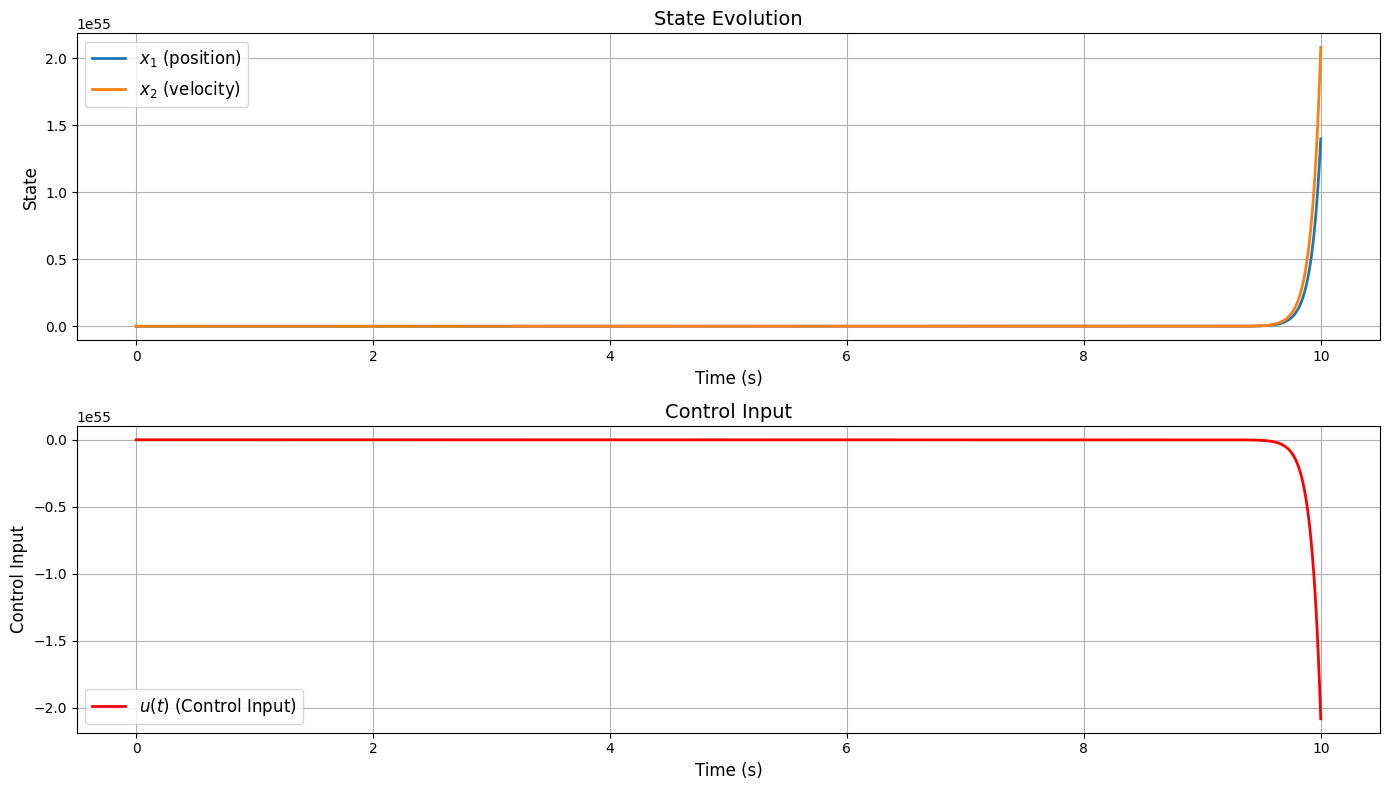

In [25]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# 시스템 행렬 정의
A = np.array([[5, 5],
              [20, 0]])
B = np.array([[0],
              [1]])

# 초기 상태와 최종 상태
x0 = np.array([2, 50])  # Initial state
xf = np.array([0, 0])  # Final state
T = 10.0  # 최종 시간

# 최소 에너지 제어를 위한 그램 행렬 계산
P = np.eye(2)  # 간단히 단위 행렬 사용
K = np.linalg.inv(B.T @ P @ B) @ B.T @ P

# 최소 에너지 제어 함수 정의
def u(t, x):
    return -K @ (x - xf)

# 시스템의 미분 방정식 정의
def system_dynamics(t, x):
    return A @ x + B @ u(t, x)

# 시뮬레이션 실행
t_span = (0, T)
t_eval = np.linspace(0, T, 1000)  # 데이터를 1000개로 세분화
sol = solve_ivp(system_dynamics, t_span, x0, t_eval=t_eval)

# 제어 입력 계산
control_inputs = np.array([u(t, sol.y[:, i])[0] for i, t in enumerate(sol.t)])

# 결과 시각화
plt.figure(figsize=(14, 8))

# 상태 변화 플롯
plt.subplot(2, 1, 1)
plt.plot(sol.t, sol.y[0, :], label=r"$x_1$ (position)", linewidth=2)
plt.plot(sol.t, sol.y[1, :], label=r"$x_2$ (velocity)", linewidth=2)
plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.title("State Evolution", fontsize=14)
plt.legend(fontsize=12)
plt.grid()

# 제어 입력 플롯
plt.subplot(2, 1, 2)
plt.plot(sol.t, control_inputs, label=r"$u(t)$ (Control Input)", color="red", linewidth=2)
plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("Control Input", fontsize=12)
plt.title("Control Input", fontsize=14)
plt.legend(fontsize=12)
plt.grid()

plt.tight_layout()
plt.show()


In [26]:
import numpy as np

# 시스템 행렬 A, B 정의 (2차원 시스템)
A = np.array([[0, 1],  # 위치는 속도에 의존
              [0, 0]]) # 속도는 제어 입력에 의존
B = np.array([[0], 
              [1]])  # 제어 입력은 속도에만 영향을 줌

# 초기 상태 x0 (위치: 5, 속도: -2)
x0 = np.array([5, -2])

# 목표 상태 xf (위치: 0, 속도: 0)
xf = np.array([0, 0])

# 최종 시간 T (미사일이 목표에 도달해야 하는 시간)
T = 10.0  # 10초 동안 제어


In [27]:
from scipy.linalg import expm

# 그램 행렬 계산 함수
def compute_gramian(A, B, T):
    dt = 0.01  # 작은 시간 간격
    W_c = np.zeros((A.shape[0], A.shape[0]))  # 그램 행렬 초기화
    
    # e^(A*t) 계산 및 적분
    for t in np.arange(0, T, dt):
        exp_A_t = expm(A * t)
        W_c += exp_A_t @ B @ B.T @ exp_A_t.T * dt  # 그램 행렬 계산
        
    return W_c

# 그램 행렬 계산
W_c = compute_gramian(A, B, T)
print("Gramian matrix W_c:")
print(W_c)


Gramian matrix W_c:
[[332.8335  49.95  ]
 [ 49.95    10.    ]]


In [28]:
# 최소 에너지 제어 입력 계산 함수
def minimum_energy_control(A, B, W_c, x0, xf, T, t):
    exp_A_T = expm(A * T)  # e^(A*T)
    exp_A_t = expm(A * t)  # e^(A*t)
    # 최소 에너지 제어 입력 계산
    u_t = -np.linalg.inv(B.T @ W_c @ B) @ B.T @ W_c @ (exp_A_T @ x0 - xf)
    return u_t

# 제어 입력 계산
control_inputs = np.array([minimum_energy_control(A, B, W_c, x0, xf, T, t) for t in np.linspace(0, T, 100)])

print("Control inputs at different times:")
print(control_inputs)


Control inputs at different times:
[[76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.925]
 [76.

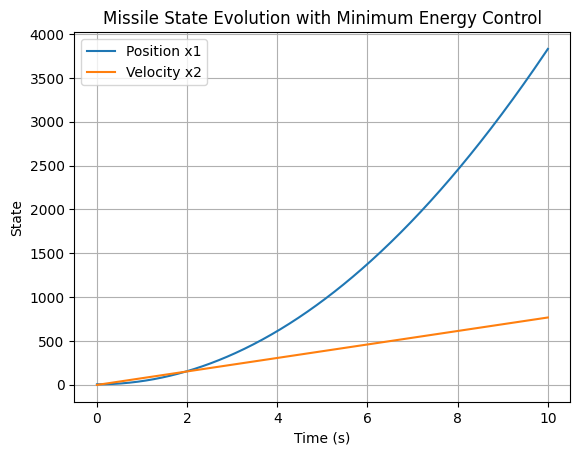

In [29]:
from scipy.integrate import solve_ivp

# 시스템의 미분 방정식
def system_dynamics(t, x, A, B, W_c, x0, xf, T):
    u_t = minimum_energy_control(A, B, W_c, x0, xf, T, t)  # 제어 입력
    return A @ x + B @ u_t  # 시스템 동역학

# 초기 상태
x0 = np.array([5, -2])

# 시뮬레이션 실행
t_span = (0, T)
t_eval = np.linspace(0, T, 500)
sol = solve_ivp(system_dynamics, t_span, x0, t_eval=t_eval, args=(A, B, W_c, x0, xf, T))

# 결과 출력
import matplotlib.pyplot as plt
plt.plot(sol.t, sol.y[0], label="Position x1")
plt.plot(sol.t, sol.y[1], label="Velocity x2")
plt.xlabel('Time (s)')
plt.ylabel('State')
plt.title('Missile State Evolution with Minimum Energy Control')
plt.legend()
plt.grid(True)
plt.show()


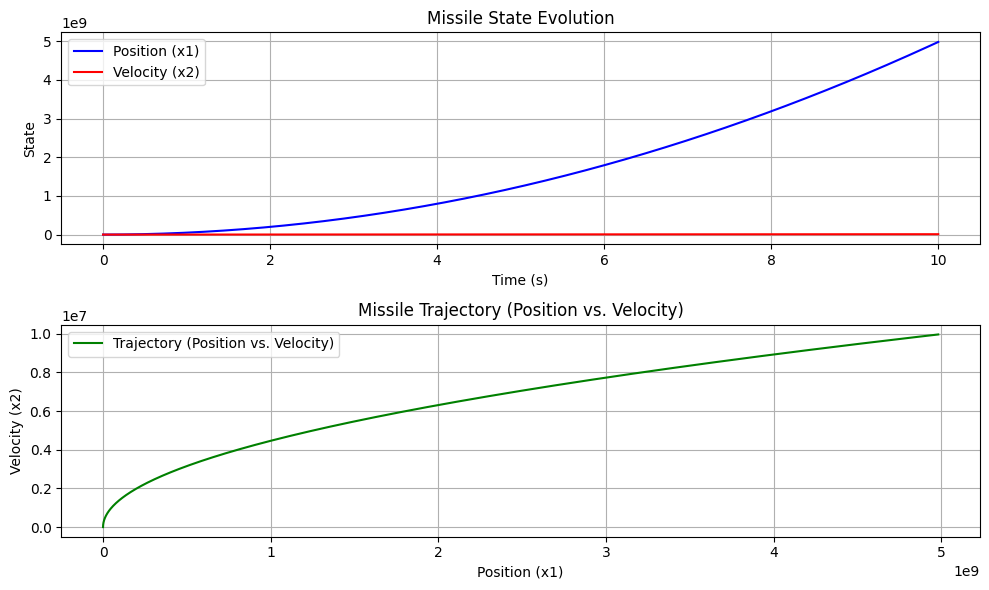

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
from scipy.integrate import solve_ivp

# 시스템 정의
g = 9.81  # 중력 가속도 (m/s^2)
A = np.array([[0, 100],  # 위치는 속도에 의존
              [0, 0]]) # 속도는 제어 입력에 의존
B = np.array([[0], 
              [1]])  # 제어 입력은 속도에만 영향을 줌

# 초기 상태 x0 (위치: 5, 속도: -2)
x0 = np.array([5, -2])

# 목표 상태 xf (위치: 0, 속도: 0)
xf = np.array([0, 0])

# 최종 시간 T (미사일이 목표에 도달해야 하는 시간)
T = 10.0  # 10초 동안 제어

# 그램 행렬 계산 함수
def compute_gramian(A, B, T):
    dt = 0.01  # 작은 시간 간격
    W_c = np.zeros((A.shape[0], A.shape[0]))  # 그램 행렬 초기화
    
    # e^(A*t) 계산 및 적분
    for t in np.arange(0, T, dt):
        exp_A_t = expm(A * t)
        W_c += exp_A_t @ B @ B.T @ exp_A_t.T * dt  # 그램 행렬 계산
        
    return W_c

# 그램 행렬 계산
W_c = compute_gramian(A, B, T)

# 최소 에너지 제어 입력 계산 함수
def minimum_energy_control(A, B, W_c, x0, xf, T, t):
    exp_A_T = expm(A * T)  # e^(A*T)
    exp_A_t = expm(A * t)  # e^(A*t)
    # 최소 에너지 제어 입력 계산
    u_t = -np.linalg.inv(B.T @ W_c @ B) @ B.T @ W_c @ (exp_A_T @ x0 - xf)
    return u_t

# 시스템의 미분 방정식
def system_dynamics(t, x, A, B, W_c, x0, xf, T):
    u_t = minimum_energy_control(A, B, W_c, x0, xf, T, t)  # 제어 입력
    return A @ x + B @ u_t  # 시스템 동역학

# 시뮬레이션 실행
t_span = (0, T)
t_eval = np.linspace(0, T, 500)
sol = solve_ivp(system_dynamics, t_span, x0, t_eval=t_eval, args=(A, B, W_c, x0, xf, T))

# 상태와 속도 시각화
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(sol.t, sol.y[0], label="Position (x1)", color='b')
plt.plot(sol.t, sol.y[1], label="Velocity (x2)", color='r')
plt.title("Missile State Evolution")
plt.xlabel('Time (s)')
plt.ylabel('State')
plt.legend()
plt.grid(True)

# 미사일의 경로 (위치 vs. 속도)
plt.subplot(2, 1, 2)
plt.plot(sol.y[0], sol.y[1], label="Trajectory (Position vs. Velocity)", color='g')
plt.title("Missile Trajectory (Position vs. Velocity)")
plt.xlabel('Position (x1)')
plt.ylabel('Velocity (x2)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


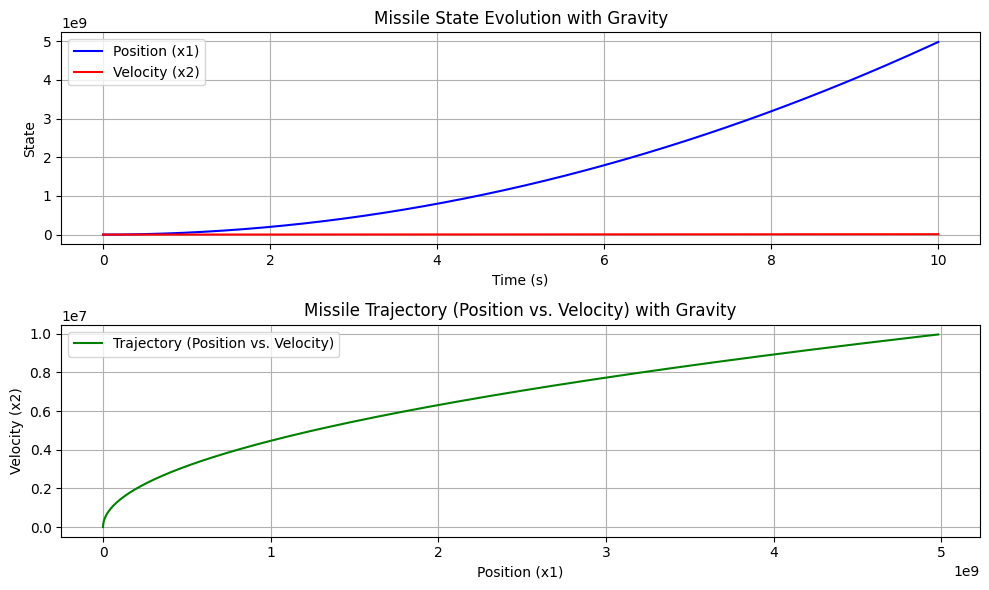

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
from scipy.integrate import solve_ivp

# 시스템 정의 (중력 포함)
g = 20  # 중력 가속도 (m/s^2)
A = np.array([[0, 100],  # 위치는 속도에 의존
              [0, 0]]) # 속도는 제어 입력에 의존
B = np.array([[0], 
              [1]])  # 제어 입력은 속도에만 영향을 줌

# 초기 상태 x0 (위치: 5, 속도: -2)
x0 = np.array([5, -2])

# 목표 상태 xf (위치: 0, 속도: 0)
xf = np.array([0, 0])

# 최종 시간 T (미사일이 목표에 도달해야 하는 시간)
T = 10.0  # 10초 동안 제어

# 그램 행렬 계산 함수
def compute_gramian(A, B, T):
    dt = 0.01  # 작은 시간 간격
    W_c = np.zeros((A.shape[0], A.shape[0]))  # 그램 행렬 초기화
    
    # e^(A*t) 계산 및 적분
    for t in np.arange(0, T, dt):
        exp_A_t = expm(A * t)
        W_c += exp_A_t @ B @ B.T @ exp_A_t.T * dt  # 그램 행렬 계산
        
    return W_c

# 그램 행렬 계산
W_c = compute_gramian(A, B, T)

# 최소 에너지 제어 입력 계산 함수
def minimum_energy_control_with_gravity(A, B, W_c, x0, xf, T, t):
    exp_A_T = expm(A * T)  # e^(A*T)
    exp_A_t = expm(A * t)  # e^(A*t)
    # 중력을 포함하여 최종 상태에서의 제어 입력 계산
    u_t = -np.linalg.inv(B.T @ W_c @ B) @ B.T @ W_c @ (exp_A_T @ x0 - xf)
    return u_t + g  # 중력 상쇄를 위해 g 추가

# 시스템의 미분 방정식 (중력 포함)
def system_dynamics_with_gravity(t, x, A, B, W_c, x0, xf, T):
    u_t = minimum_energy_control_with_gravity(A, B, W_c, x0, xf, T, t)  # 제어 입력
    return A @ x + B @ (u_t - g)  # 중력 효과 반영

# 시뮬레이션 실행
t_span = (0, T)
t_eval = np.linspace(0, T, 500)
sol = solve_ivp(system_dynamics_with_gravity, t_span, x0, t_eval=t_eval, args=(A, B, W_c, x0, xf, T))

# 상태와 속도 시각화
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(sol.t, sol.y[0], label="Position (x1)", color='b')
plt.plot(sol.t, sol.y[1], label="Velocity (x2)", color='r')
plt.title("Missile State Evolution with Gravity")
plt.xlabel('Time (s)')
plt.ylabel('State')
plt.legend()
plt.grid(True)

# 미사일의 경로 (위치 vs. 속도)
plt.subplot(2, 1, 2)
plt.plot(sol.y[0], sol.y[1], label="Trajectory (Position vs. Velocity)", color='g')
plt.title("Missile Trajectory (Position vs. Velocity) with Gravity")
plt.xlabel('Position (x1)')
plt.ylabel('Velocity (x2)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
